In [5]:
# Import necessary libraries
import pandas as pd

# Load the dataset (replace the path with your file location)
data = pd.read_csv("daily-rainfall-at-state-level.csv")

# Check first few rows
data.head()


,id,date,state_code,state_name,actual,rfs,normal,deviation
0,0,2009-01-01,5,Uttarakhand,0.0,0.003906,2.19,-100.0
1,1,2009-01-01,18,Assam,0.0,0.000000,0.52,-100.0
2,2,2009-01-01,16,Tripura,0.0,0.000000,0.09,-100.0
3,3,2009-01-01,36,Telangana,0.0,0.000000,0.17,-100.0
4,4,2009-01-01,2,Himachal Pradesh,0.0,0.008566,3.31,-100.0


In [7]:
# Check basic info: number of rows, columns, data types
data.info()

# Check for missing values
data.isnull().sum()

# Basic statistics
data.describe()

# Optional: check unique states/locations
data['state_name'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204876 entries, 0 to 204875
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          204876 non-null  int64  
 1   date        204876 non-null  object 
 2   state_code  204876 non-null  int64  
 3   state_name  204876 non-null  object 
 4   actual      187714 non-null  float64
 5   rfs         199011 non-null  float64
 6   normal      193358 non-null  float64
 7   deviation   173855 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 12.5+ MB


array(['Uttarakhand', 'Assam', 'Tripura', 'Telangana', 'Himachal Pradesh',
       'Jammu And Kashmir', 'Meghalaya', 'Lakshadweep', 'Maharashtra',
       'Punjab', 'Jharkhand', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Ladakh', 'Andaman And Nicobar Islands', 'Goa', 'Uttar Pradesh',
       'Haryana', 'Madhya Pradesh', 'Manipur', 'Karnataka', 'Chandigarh',
       'West Bengal', 'Rajasthan', 'Chhattisgarh', 'Nagaland', 'Bihar',
       'Puducherry', 'Gujarat', 'Odisha', 'Tamil Nadu', 'Kerala',
       'Sikkim', 'Delhi', 'Mizoram',
       'The Dadra And Nagar Haveli And Daman And Diu'], dtype=object)

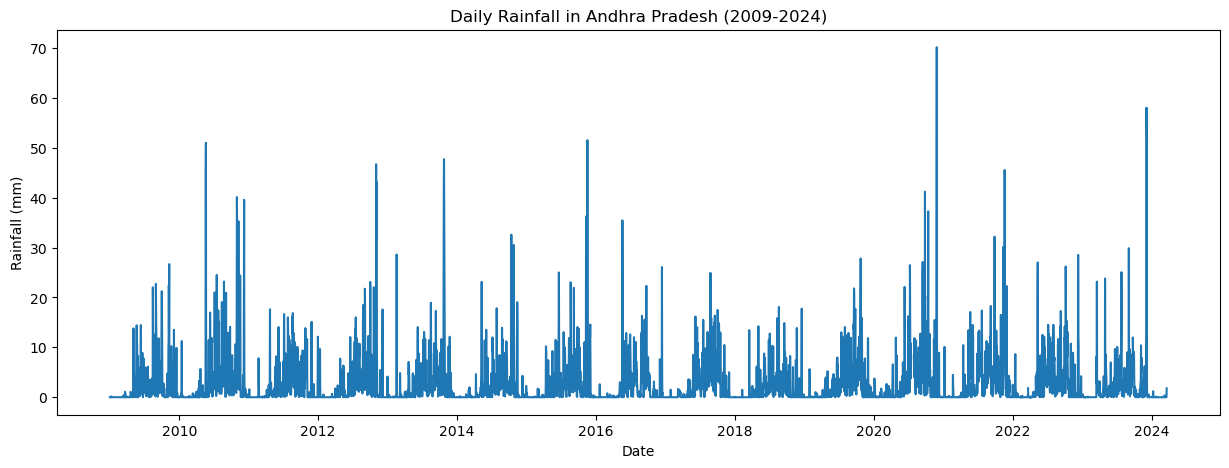

In [9]:
import matplotlib.pyplot as plt

# Filter data for a specific state
state_data = data[data['state_name'] == 'Andhra Pradesh']

# Plot actual rainfall over time
plt.figure(figsize=(15,5))
plt.plot(pd.to_datetime(state_data['date']), state_data['actual'])
plt.title('Daily Rainfall in Andhra Pradesh (2009-2024)')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.show()


In [11]:
# Fill missing 'actual' values (target column) with 0
data['actual'] = data['actual'].fillna(0)


In [13]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])


In [15]:
# Sort data by state and date
data = data.sort_values(['state_name','date'])

# Create previous day's rainfall as a feature
data['rainfall_lag1'] = data.groupby('state_name')['actual'].shift(1)
data['rainfall_lag1'] = data['rainfall_lag1'].fillna(0)


In [17]:
# Month and Day of Year features
data['month'] = data['date'].dt.month
data['day_of_year'] = data['date'].dt.dayofyear


In [19]:
# Features and target
features = ['rainfall_lag1', 'month', 'day_of_year']
X = data[features]
y = data['actual']

# Check first few rows
X.head(), y.head()


(     rainfall_lag1  month  day_of_year
 14             0.0      1            1
 49             0.0      1            2
 84             0.0      1            3
 119            0.0      1            4
 154            0.0      1            5,
 14     0.0
 49     0.0
 84     0.0
 119    0.0
 154    0.0
 Name: actual, dtype: float64)

In [21]:
# Step 5.1: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((163900, 3), (40976, 3), (163900,), (40976,))

In [23]:
# Step 5.2: Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
lr_model = LinearRegression()

# Train model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_lr, r2_lr


(49.941464402058735, 0.4041993367943484)

In [25]:
# Step 5.3: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(58.52752577113132, 0.3017677978063368)

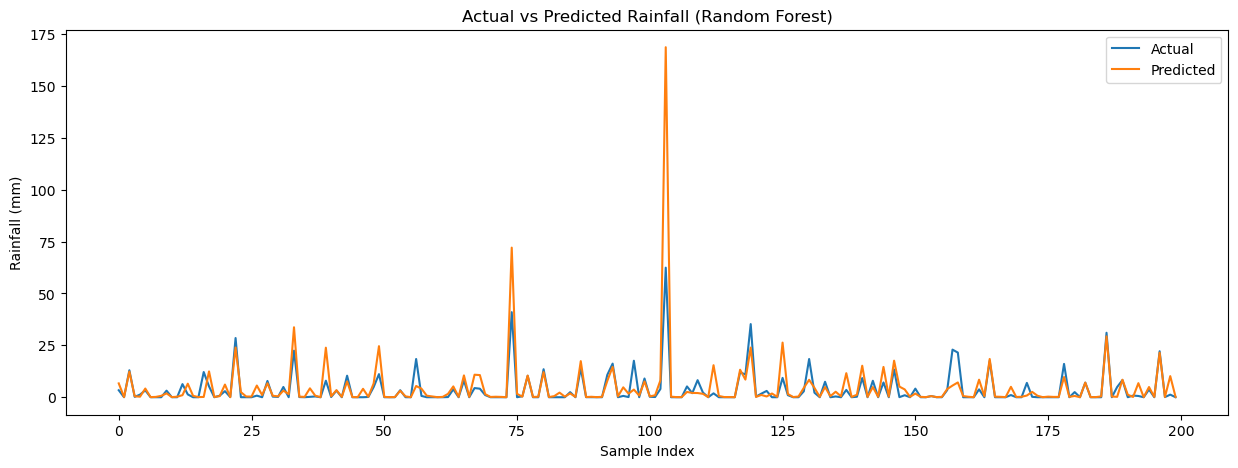

In [27]:
# Step 5.4: Plot actual vs predicted rainfall (Random Forest)
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(y_test.values[:200], label='Actual')  # first 200 points for clarity
plt.plot(y_pred_rf[:200], label='Predicted')
plt.title('Actual vs Predicted Rainfall (Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()


In [29]:
# Step 6.1: Feature Importance from Random Forest
import pandas as pd

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances



,Feature,Importance
0,rainfall_lag1,0.756638
2,day_of_year,0.229505
1,month,0.013857


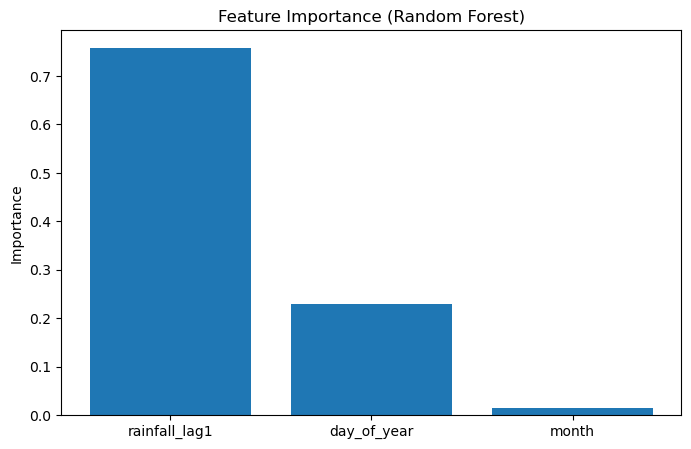

In [31]:
plt.figure(figsize=(8,5))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance')
plt.show()

In [33]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Use smaller parameter grid for speed
param_grid = {
    'n_estimators': [50, 100],   # smaller number of trees
    'max_depth': [10, 20],       # fewer depth options
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Use a smaller subset of data to speed up tuning
subset_size = 5000  # first 5000 rows
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=2,               # 2-fold CV instead of 3
    n_jobs=-1,
    scoring='r2'
)

# Fit on subset
grid_search.fit(X_train[:subset_size], y_train[:subset_size])

# Show best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [35]:
# Train Random Forest with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred_best = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

mse_best, r2_best

(47.96372611698686, 0.4277937146525286)

y_test shape: (40976,)
y_pred_best shape: (40976,)


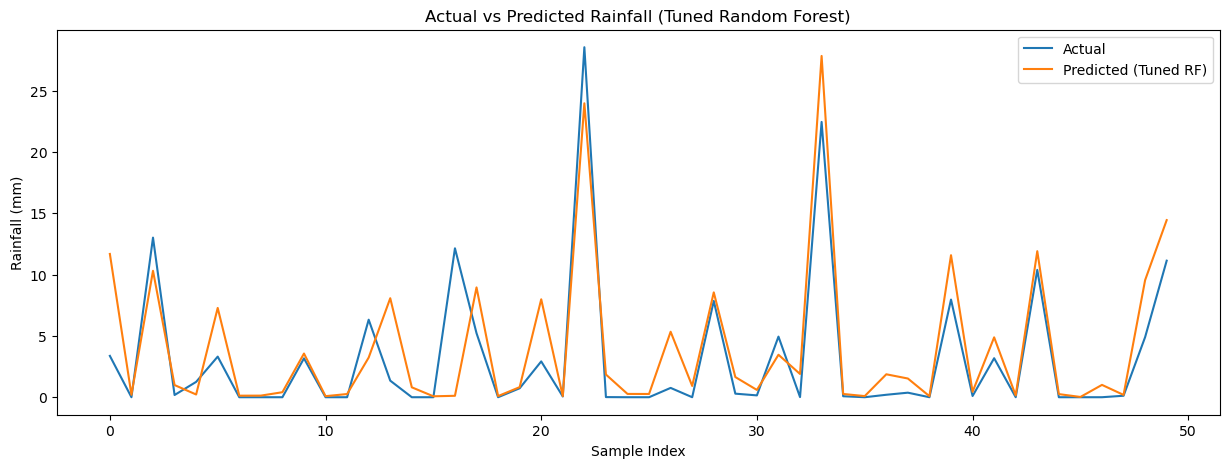

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

print("y_test shape:", y_test.shape)
print("y_pred_best shape:", y_pred_best.shape)

plt.figure(figsize=(15,5))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred_best[:50], label='Predicted (Tuned RF)')
plt.title('Actual vs Predicted Rainfall (Tuned Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()


In [44]:
import joblib
joblib.dump(best_rf, "best_rf_model.pkl")
print("Model saved as best_rf_model.pkl")



Model saved as best_rf_model.pkl
